# Assignment week 3

# Steven Raaijmakers (10804242) & Ajit Jena (5730066)

## Exercises E&K Chap 5

The exercises 1,2,3,4 from E&amp; K Chap 5 plus the extensions of these exercises given  in the lecture notes (see     <a href='../../LectureNotes/weekEandKch5.html#hw'>E&amp;K ch5</a>)

### 1.  According to the definitions in this chapter, is this network on 90 people balanced? Give a brief explanation for your answer.

The three groups of people each containing 30 people who are friends with each other can be seen as three seperate sets. Let's call them X,Y and Z. If there were two sets that each are friends with people in their own set and are enemies of everyone from another (single) set the network would be balanced. However we have three sets in this case. The network is not balanced. For a set to be balanced a so called triangle should contain one or three plusses. In this case there are three negative relations between the sets. Two of the three sets X, Y or Z will tend to 'befriend' each other to achieve a balance.
The network is not balanced.

### 2. For each edge, how many of the triangles it participates in are balanced, and how many are unbalanced?

#### A-B +
ABC: Unbalanced <br/>
ABD: Unbalanced <br/>
ABE: Balanced <br/>

2 unbalanced and 1 balanced triangles

#### A-D -
ABD: Unbalanced <br/>
ACD: Balanced <br/>
ADE: Balanced <br/>

1 unbalanced and 2 balanced triangles

Due to symmatry the answers above apply to all positive edges alike and negative edges alike.


### 3. 
#### (a) Can node D do this in such a way that it doesn’t become involved in any unbalanced triangle?

Yes node D can do that. There are 6 different ways it can do that. 

If node D connects to nodes A, B and C with edge D-A being an edge lying in between edges D-B and D-C there are two ways to label the edges to make it so D is not involved in any unbalanced traingle. <br/>
D-C: - <br/>
D-A: + <br/>
D-B: - <br/>

or

D-C: + <br/>
D-A: - <br/>
D-B: + <br/>

In both cases D has triangles containing only 1 +. There are two different possibilities. As long as the edge that lies in the middle has an opposite sign compared to the two outer edges. These two different possibilities also apply when D's middle edge is connected to B or C, so there are 3 * 2 = 6 different possibilities.

#### (b) Can node D do this in such a way that it doesn’t become involved in any unbalanced triangle?

There are 6 different possibilities. If D-A is the middle edge between D-B and D-C and all three edges have the same sign the triangles containing D will be balanced, that gives us two possibilities. 

If D is connected to C as the middle edge the following configurations would also make it so that D is not involved in unbalanced:

D-B: + <br/>
D-C: - <br/>
D-A: - <br/>

or

D-B: - <br/>
D-C: + <br/>
D-A: + <br/>

The above can be applied to D-B being the middle edge too, we just have to switch the values of edges D-B and D-C. Therefore there are 6 possibilities.





## Programmeer opgaven

### P1 breadth first search

Maak een Python programma/functie dat als input een netwerk (in NetworkX formaat) en een knoop 'x' in dat netwerk neemt. Als output drukt het het volgende af:
```
                afstand knopen
                0       ['x']
                1       ['a','b',...]
                2       ...
                3       ...
                ...
```    
Maak beide implementaties die hieronder beschreven staan en vergelijk de output.

1. Je kan dit makkelijk doen door een NetworkX functie te vinden die kortste paden berekend. 

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G=nx.karate_club_graph()

In [5]:
# p1
def p1(G, Node):
    tree = {}
    # Check alle nodes in G
    for i in G.nodes():
        # Bereken afstand tussen node i en Node
        distance = len(nx.shortest_path(G, Node, i)) - 1
        # Voeg toe aan dictionary
        if distance in tree:
             tree[distance].append(i)
        else:
            tree[distance] = [i]
    return tree
        
d = p1(G, 0)

print "Afstand     Knopen"
for key, value in d.items():
    print str(key) + "           " + str(value)

Afstand     Knopen
0           [0]
1           [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]
2           [9, 16, 24, 25, 27, 28, 30, 32, 33]
3           [14, 15, 18, 20, 22, 23, 26, 29]


2. Maar je kunt natuurlijk ook Dijkstra's kortste pad algorithme zelf implementeren! Hier is een hint.
```
# Implement the breadth first algorithm from E& K section 2.3
                # Pseudocode:
                
                # First define a function which produces the neighbours of x in G which are not already in the list (better set) Memory
                def NextLevel(G,Node,Memory):
                    # RETURN: list/set of nodes which are neighbours of Node but not in Memory
                    
                # Now we implement Dijkstra using recursion:
                #
                # Call with dijkstra(G,[x],[x],0) 
                
                 def dijkstra(G,LevelSet,Memory,Distance):
                        print Distance, LevelSet
                #
                # Next = Union van de uitkomsten van  NextLevel(G,Knoop,Memory) voor elke Knoop in LevelSet
                # NewMemory = Memory union Next
                #       if Next == []:
                            then stop
                            else dijkstra(G,Next,NewMemory,Distance+1)
```
            

In [6]:
def NextLevel(G, Node, Memory):
    neighbors = G.neighbors(Node)
    tmp = []
    for i in neighbors:
        if i not in Memory:
            tmp.append(i)
    return tmp
    

print NextLevel(G, 1, [2, 3])

[0, 7, 13, 17, 19, 21, 30]


## P2 Breadth first search again

1. Herschrijf je breadth first functie van de vorige opgave zodat het niks meer uitprint maar een dict oplevert met afstanden als sleutels en de lijst met knopen op die afstand van de input-knoop als waarden. Zie het voorbeeld hieronder. 

2. Geef een mooie en duidelijek docstring aan je functie.

In [7]:
# Wij hebben p1 al als dictionary geprogrammeerd, dus deze functie is nagenoeg hetzelfde (als p1())

def dijkstra2(G, n):
    "functie returned dictionary met als key de afstand, en als value een lijst van knopen binnen die afstand"
    tree = {}
    for i in G.nodes():
        distance = len(nx.shortest_path(G, n, i)) - 1
        if distance in tree:
             tree[distance].append(i)
        else:
            tree[distance] = [i]
    return tree
        
print dijkstra2(G, 24)

{0: [24], 1: [25, 27, 31], 2: [0, 2, 23, 28, 32, 33], 3: [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 26, 29, 30], 4: [16]}


## P3  
Maak een python programma dat een netwerk als input neemt, en voor alle knopen
                de clustering-coefficient (Section 3.1 E&amp;K) berekent en als volgt uitprint:
                (orden de knopen op hun CC met de hoogste eerst). 
                <strong>Bereken dit zelf, gebruik geen NetwrokX functie die dit al doet. </strong>. Je mag natuurlijk wel NetworkX handigheidjes als <tt>G.neighbors(v)</tt> gebruiken.

In [8]:
import itertools
from __future__ import division

def p3(G):
    tree = {}
    # Check voor alle nodes in G
    for node in G.nodes():
        # Vraag van elke node zijn buren op
        neighbors = G.neighbors(node)
        
        friend_c = 0   
        
        # Alle unieke combinaties van lengte 2 binnen de buren van huidige node       
        combinations = list(itertools.combinations(neighbors, 2))
        comb_c = len(combinations)
        
        # Check voor elke combinatie of ze direct verbonden zijn, zo ja; hoog friend_c op
        for i, j in combinations:
            if G.has_edge(i, j):
                friend_c += 1
        tree[node] = (comb_c, friend_c)
    return tree
        
d = p3(G)

print "Knoop     CC"
for key, (combinations, friends) in d.items():
    print str(key) + "         " + str(friends) + "/" + str(combinations)

Knoop     CC
0         18/120
1         12/36
2         11/45
3         10/15
4         2/3
5         3/6
6         3/6
7         6/6
8         5/10
9         0/1
10         2/3
11         0/0
12         1/1
13         6/10
14         1/1
15         1/1
16         1/1
17         1/1
18         1/1
19         1/3
20         1/1
21         1/1
22         1/1
23         4/10
24         1/3
25         1/3
26         1/1
27         1/6
28         1/3
29         4/6
30         3/6
31         3/15
32         13/66
33         15/136


## P4       
Vind een manier waarop je in NetworkX een netwerk met sterke en zwakke lijnen 
 (als in Chapter 3 E&amp;K) kunt representeren.

Representeer het netwerk van Figuur 3.5 op die manier. 

Print ook een plaatje, waarbij je de labels op de lijnen ook weergeeft.

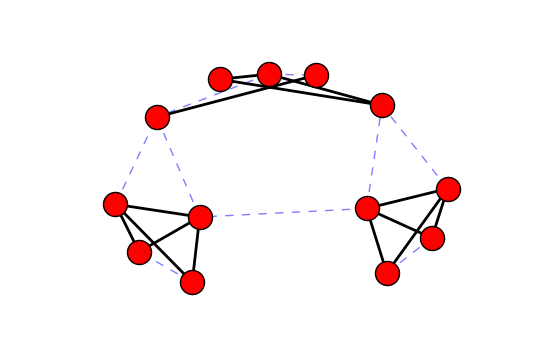

In [9]:
# moet ik echt dat hele ding gaan overnemen???

N = nx.Graph()

N.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'])


N.add_edge('A', 'B', weight=0.4)
N.add_edge('A', 'D', weight=0.6)
N.add_edge('A', 'E', weight=0.6)
N.add_edge('A', 'C', weight=0.6)
N.add_edge('A', 'F', weight=0.4)

N.add_edge('D', 'E', weight=0.4)
N.add_edge('D', 'C', weight=0.6)

N.add_edge('C', 'F', weight=0.4)
N.add_edge('C', 'E', weight=0.6)

N.add_edge('F', 'J', weight=0.6)
N.add_edge('F', 'G', weight=0.6)

N.add_edge('J', 'G', weight=0.6)

N.add_edge('G', 'K', weight=0.4)
N.add_edge('G', 'H', weight=0.4)

N.add_edge('K', 'H', weight=0.6)

N.add_edge('H', 'B', weight=0.4)
N.add_edge('H', 'I', weight=0.4)

N.add_edge('B', 'I', weight=0.6)
N.add_edge('B', 'M', weight=0.6)
N.add_edge('B', 'L', weight=0.6)

N.add_edge('I', 'L', weight=0.6)
N.add_edge('I', 'M', weight=0.6)

N.add_edge('L', 'M', weight=0.4)

strong = [(u,v) for (u,v,d) in N.edges(data=True) if d['weight'] >0.5]
weak = [(u,v) for (u,v,d) in N.edges(data=True) if d['weight'] <= 0.5]

NP = nx.spring_layout(N)

nx.draw_networkx_nodes(N, pos=NP)

nx.draw_networkx_edges(N ,pos=NP, edgelist=strong, width=2)
nx.draw_networkx_edges(N ,pos=NP, edgelist=weak,
                    width=1,alpha=0.5,edge_color='b',style='dashed')

plt.axis('off')
plt.show() 

## P5
Schrijf de Python functies STC(G) voor G een Networkx ongericht netwerk met 
                sterke en zwakke relaties
                en STC(G,x) for x een knoop met de volgende output:
<ul>
    <li>Als G (of x) voldoet aan de Strong Triadic Closure eigenschap dan true().</li>
    <li>Zoniet, dan is de output een tegenvoorbeeld. Bij een G als input is dat dus een niet voltooide driehoek. 
        Bij een knoop x als input, zijn dat de twee sterke lijnen en eindknopen waartussen geen lijn (zelfs niet zwak) zit.</li>
</ul>
            Check dat Figuur 3.5 inderdaad voldoet aan de STC. 
            Verander wat in Fig 3.5 zodat STC niet meer opgaat en draai je programma opnieuw. 

In [10]:
# Definitie van "Sterke link"
def is_strong(weight):
    if weight > 0.5:
        return True
    return False

# STC Checking
def STC_h(G, x):
    # Vraag naar alle neighbors van X
    neighbors = G.neighbors(x)
    strongs = []
    for n in neighbors:
        weight = G.get_edge_data(x, n)["weight"]
        if is_strong(weight):
            # Voeg neighbor toe aan strong list
            strongs.append(n)

    # Alle unieke combinaties van de elementen in "strong" met een lengte van 2
    combinations = list(itertools.combinations(strongs, 2))

    for i, j in combinations:
        # Check of unieke combinatie uberhaupt een linnk heeft
        if not G.has_edge(i, j):
            # Zo niet; return dan dit paar (als tegenvoorbeeld)
            return (i, j)
    # Als alle combinaties dus wel een edge hebben geld de STC:
    return True

# User functie:
def STC(*arg):
    G = arg[0]
    
    # Check of user een Node heeft meegegeven:    
    x = 0    
    if len(arg) > 1:
        x = arg[1]
    
    # Als user een Node heeft meegegeven
    if(x):
        return STC_h(G, x)
    # Als user geen node heeft meegegeven: check voor alle nodes in G
    else:
        for node in G.nodes():
            k = STC_h(G, node)
            # Zodra k een waarde anders dan True krijgt, is de STC verbroken
            if k != True:
                return k
        return True
        
        
print STC(N)

N2 = N.copy()
N2.remove_edge('D', 'E')

print STC(N2)

True
('E', 'D')


In [1]:
import networkx as nx

E = {(1,2), (2,3), (2,4), (3,4), (3,5), (4,5), (5,6)}

G = nx.Graph()
G.add_edges_from(E)

gatekeepers = 0

for n in G.nodes():
    neighbors = G.neighbors(n)
    combinations = list(itertools.combinations(neighbors, 2))
    for i, j in combinations:
        if not G.has_edge(i, j):
            print n, (i, j?)

nx.draw(G)
print nx.diameter(G)

print nx.eccentricity(G, v=2)


2
